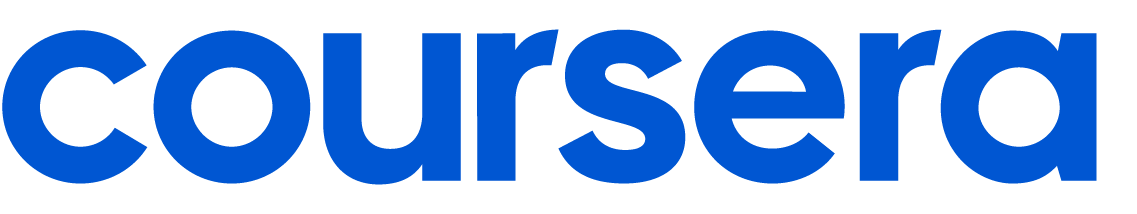

# Welcome to the Data Science Coding Challange!
Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

### Introduction
In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service!

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:

- the customer completes all content they were interested in, and no longer need the subscription
- the customer finds themselves to be too busy and cancels their subscription until a later time
- the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

### Understanding the Datasets
Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled train.csv and the other is titled test.csv.

train.csv contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The test.csv dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the train.csv data, predict whether the subscriptions in test.csv will be continued for another month, or not.

# Dataset descriptions
Both train.csv and test.csv contain one row for each unique subscription. For each subscription, a single observation (CustomerID) is included during which the subscription was active.

In addition to this identifier column, the train.csv dataset also contains the target label for the task, a binary column Churn.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


# Import Required Libaries

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the Data

In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


# Exploratory Data Analysis

In [5]:
# Display basic information about the datasets
print("Train Data Info:")
print(train_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                2

In [6]:
print("\nTest Data Info:")
print(test_df.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  object 
 4   PaymentMethod             104480 non-null  object 
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  object 
 13  UserRating                1

In [7]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Train Data:")
print(train_df.describe())


Summary Statistics for Train Data:
          AccountAge  MonthlyCharges   TotalCharges  ViewingHoursPerWeek  \
count  243787.000000   243787.000000  243787.000000        243787.000000   
mean       60.083758       12.490695     750.741017            20.502179   
std        34.285143        4.327615     523.073273            11.243753   
min         1.000000        4.990062       4.991154             1.000065   
25%        30.000000        8.738543     329.147027            10.763953   
50%        60.000000       12.495555     649.878487            20.523116   
75%        90.000000       16.238160    1089.317362            30.219396   
max       119.000000       19.989957    2378.723844            39.999723   

       AverageViewingDuration  ContentDownloadsPerMonth     UserRating  \
count           243787.000000             243787.000000  243787.000000   
mean                92.264061                 24.503513       3.002713   
std                 50.505243                 14.421174  

In [8]:
# Display summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns in Train Data:")
print(train_df.describe(include=['object']))


Summary Statistics for Categorical Columns in Train Data:
       SubscriptionType     PaymentMethod PaperlessBilling ContentType  \
count            243787            243787           243787      243787   
unique                3                 4                2           3   
top            Standard  Electronic check               No        Both   
freq              81920             61313           121980       81737   

       MultiDeviceAccess DeviceRegistered GenrePreference  Gender  \
count             243787           243787          243787  243787   
unique                 2                4               5       2   
top                   No         Computer          Comedy  Female   
freq              122035            61147           49060  121930   

       ParentalControl SubtitlesEnabled  CustomerID  
count           243787           243787      243787  
unique               2                2      243787  
top                Yes              Yes  UHO46DPOG8  
freq    

### Visualize the data

In [9]:
#define categorical and numerical columns
categorical_features = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling',
                       'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
                       'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']


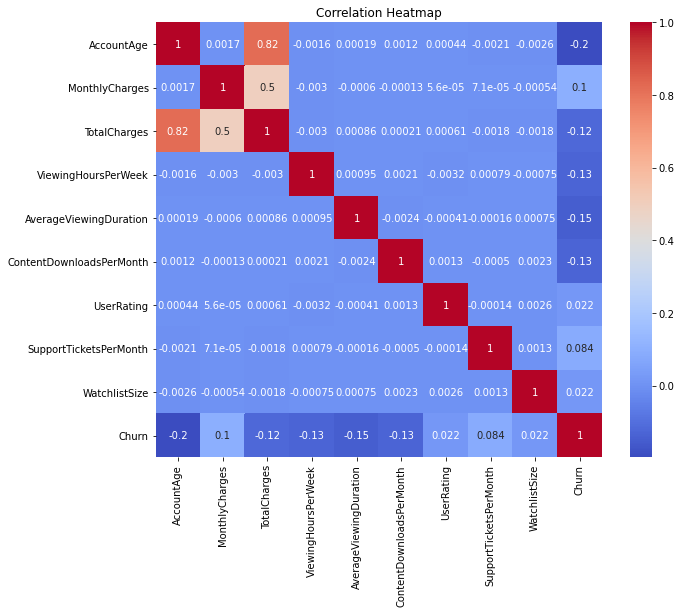

In [10]:
# Visualize correlation between numeric features with a heatmap
plt.figure(figsize=(10, 8))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


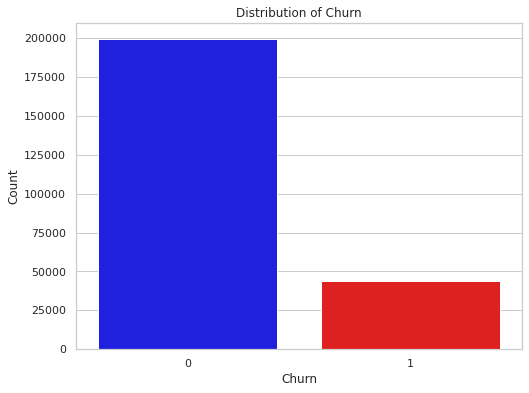

In [44]:
# Define the colors you want to use
colors = ["blue", "red"]

# Visualize the distribution of the target variable with custom bar colors
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=train_df, palette=colors)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


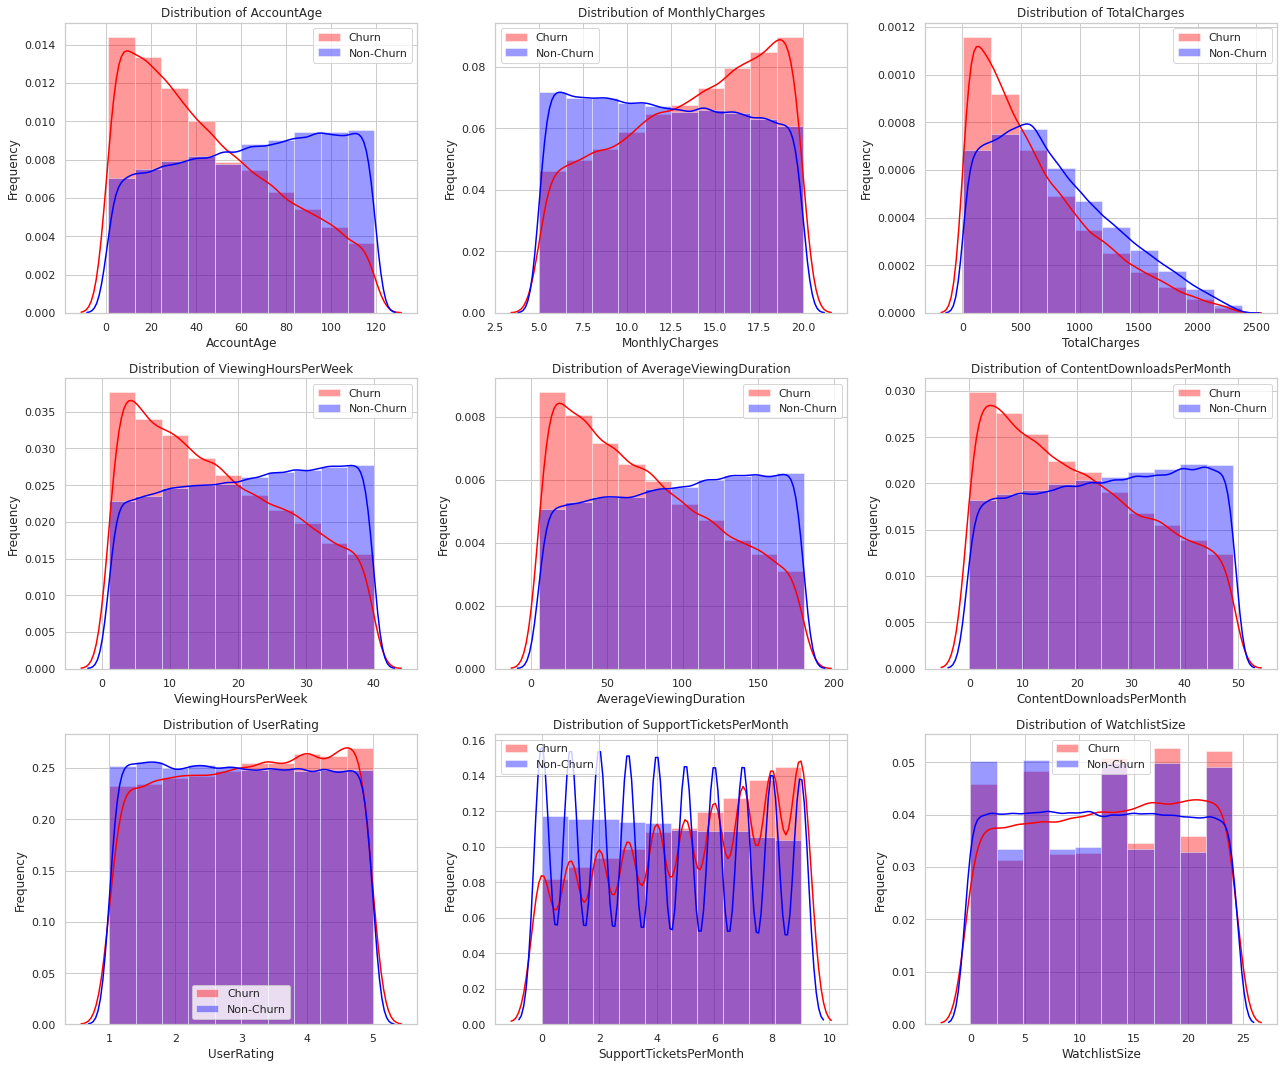

In [12]:
#Histograms of numeric columns
# Set the style of the plots
sns.set(style="whitegrid")

# Calculate the number of rows needed
num_rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0)

# Create a figure with subplots for stacked histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
plt.subplots_adjust(hspace=0.5)

# Create stacked histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    churn_values = train_df[train_df['Churn'] == 1][feature]
    non_churn_values = train_df[train_df['Churn'] == 0][feature]
    
    bins = np.histogram(np.hstack((churn_values, non_churn_values)), bins=10)[1]
    
    sns.distplot(churn_values, bins=bins, color='red', ax=ax, label='Churn', kde=True)
    sns.distplot(non_churn_values, bins=bins, color='blue', ax=ax, label='Non-Churn', kde=True)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any empty subplots
if len(numerical_features) % 3 != 0:
    for i in range(len(numerical_features) % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

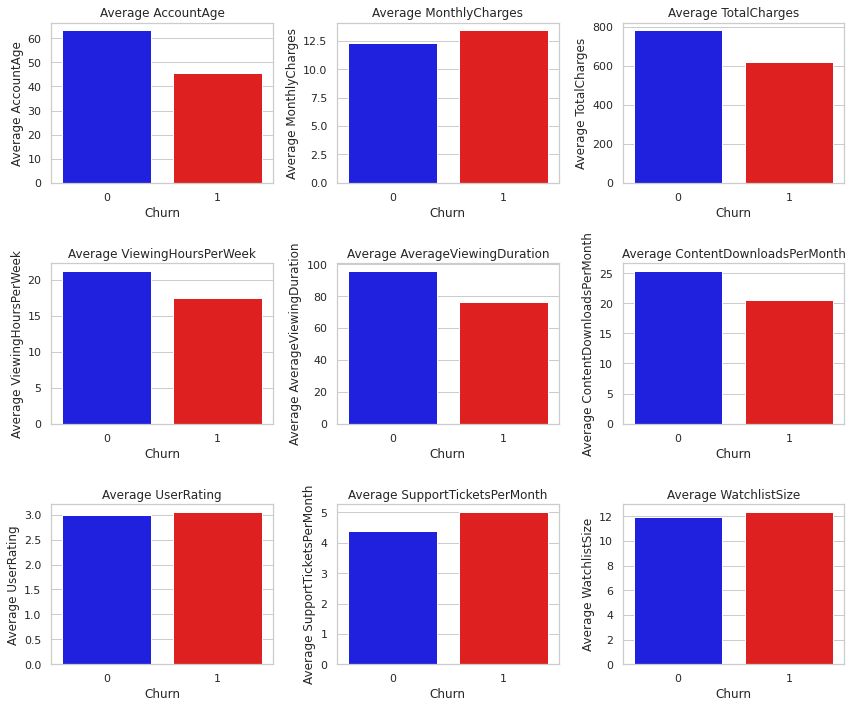

In [36]:
# Group data by 'Churn' and calculate mean values for numeric features
churn_profiles = train_df.groupby('Churn').mean()

# Define the colors for churner and non-churner bars
colors = ["blue", "red"]

# Plot churner vs. non-churner profiles using bar plots for numeric features
plt.figure(figsize=(12, 10))
for feature in numerical_features:
    plt.subplot(3, 3, numerical_features.index(feature) + 1)
    sns.barplot(x=churn_profiles.index, y=feature, data=churn_profiles, palette=colors)
    plt.title(f'Average {feature}')
    plt.xlabel('Churn')
    plt.ylabel(f'Average {feature}')
    plt.tight_layout()

plt.show()



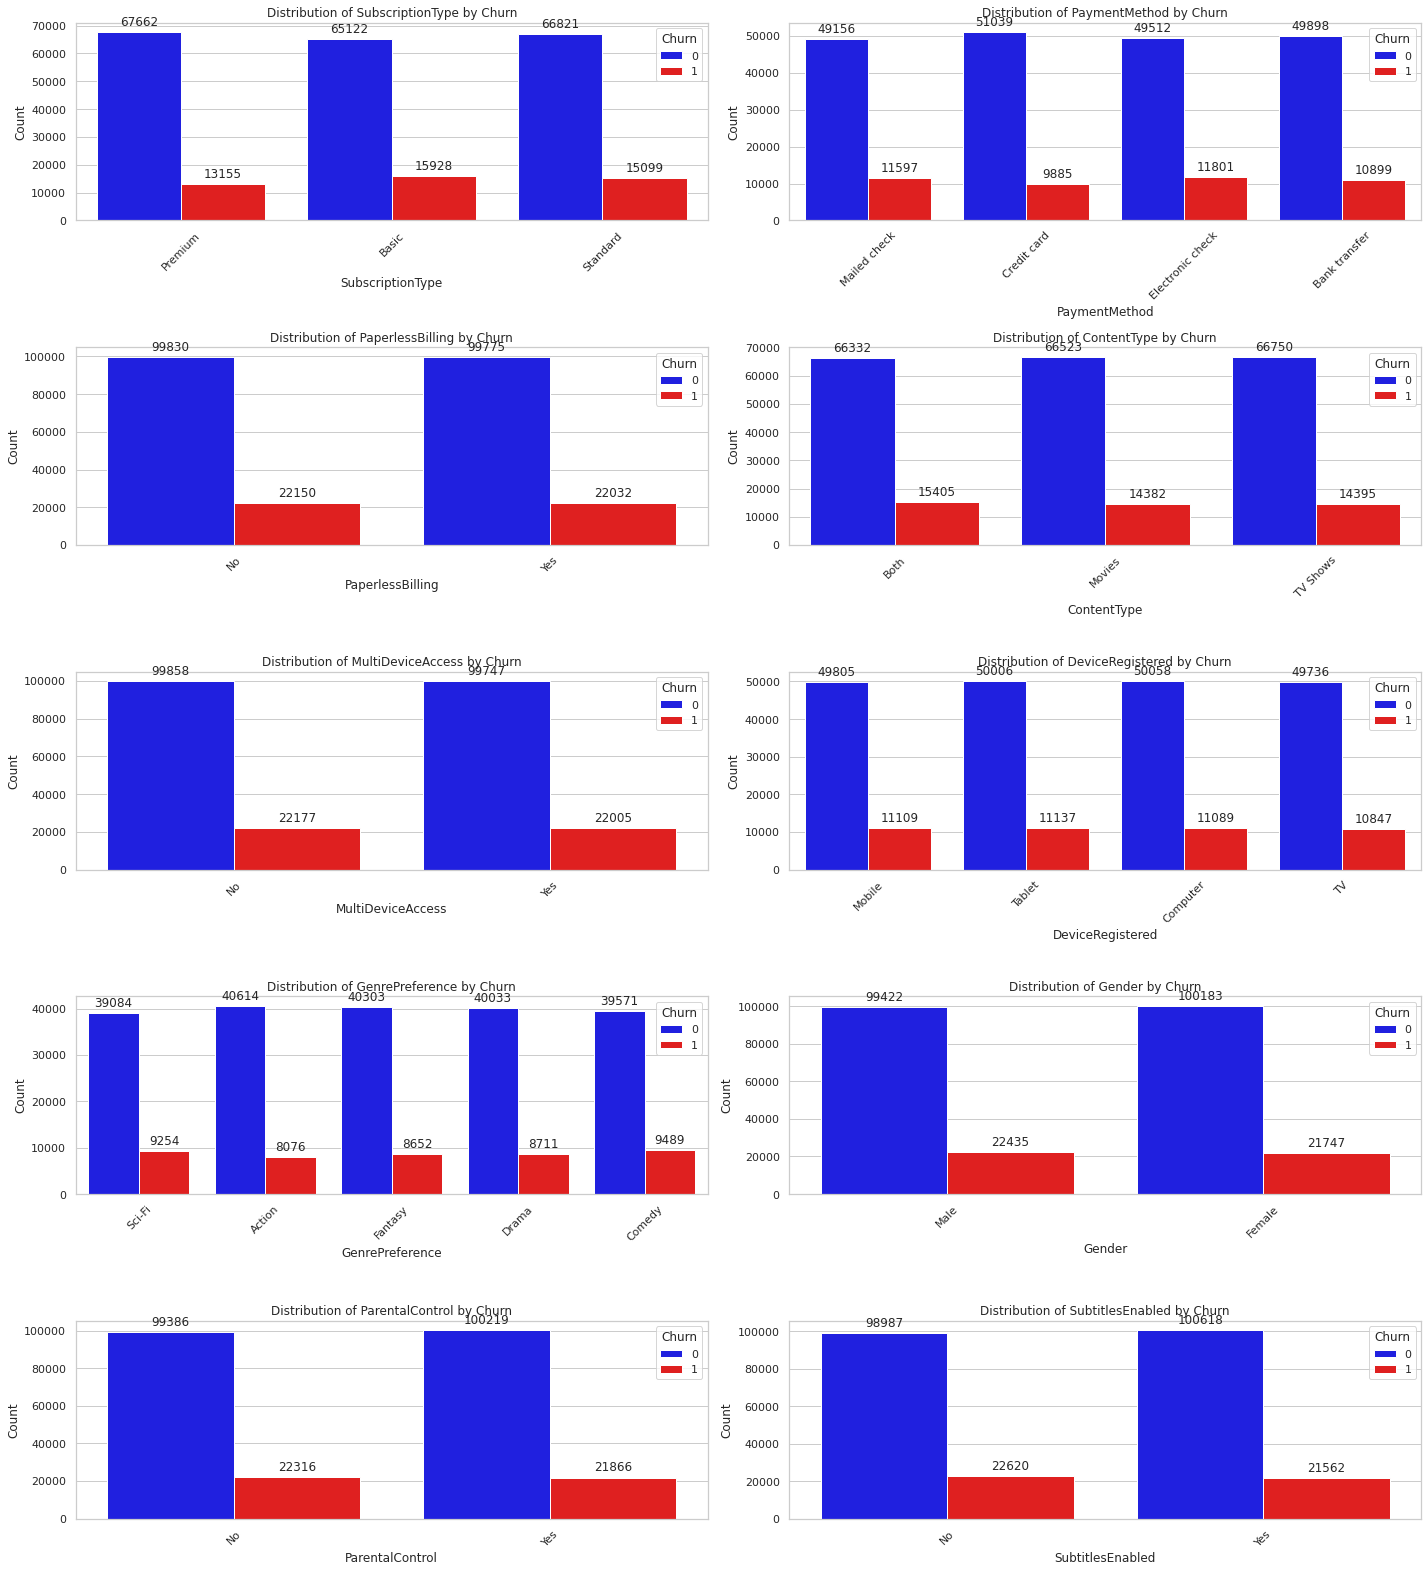

In [43]:
# Define colors for churner and non-churner bars
churn_colors = ["blue", "red"]

# Plot churner vs. non-churner profiles for categorical features
plt.figure(figsize=(20, 22))
for feature in categorical_features:
    plt.subplot(5, 2, categorical_features.index(feature) + 1)
    
    ax = sns.countplot(x=feature, hue='Churn', data=train_df, palette=churn_colors)
    
    # Display counts on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
    
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



### Users are more likely to churn if they have younger accounts. Interestingly, they are more likely to churn if their monthly charges are higher, but less likely to churn the higher their total charges are. Churned users have lower viewing hours per week and lower average viewing duration. They also download less content per month and submit more support tickets per month. Also, it is worth noting that churned users on average have a higher user rating. 
### In terms of the categorical columns, we can see that premium members are less likely to churn. Also, users who prefer sci-fi and comedy genres are slightly less likely to churn. User who pay with credit card are less likely to churn.

## Cleaning the data

In [15]:
# Explore missing values
missing_values_test = test_df.isnull().sum()
print("Missing Values in Test Data:\n", missing_values_test)

Missing Values in Test Data:
 AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64


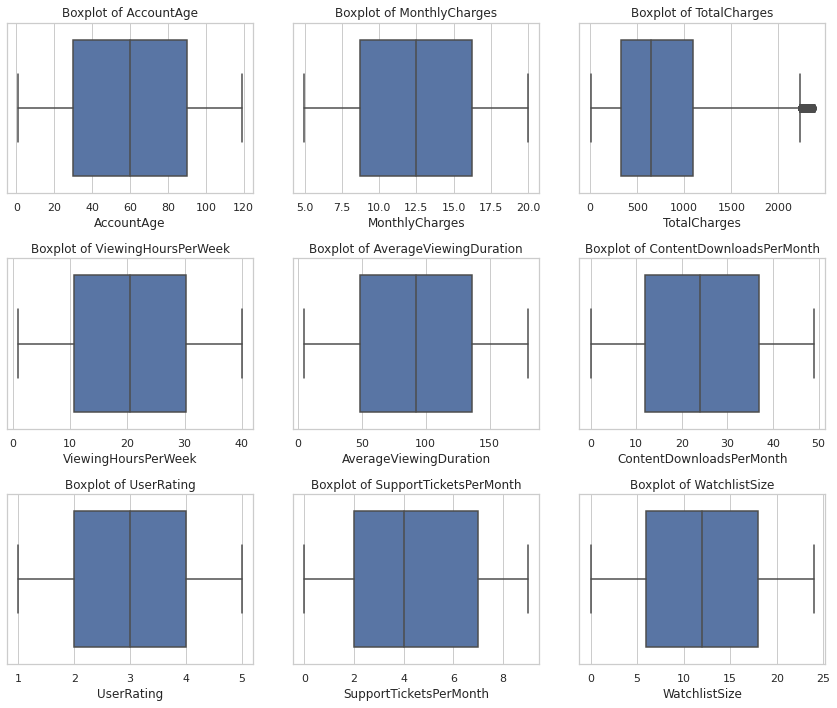

In [16]:
# Detect and visualize outliers for numerical features using box plots
plt.figure(figsize=(12, 10))
num_numerical_features = len(numerical_features)
rows = (num_numerical_features + 2) // 3
for index, feature in enumerate(numerical_features, start=1):
    plt.subplot(rows, 3, index)
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


There appear to be outliers in TotalCharges.

In [17]:
# Remove outliers using IQR
def remove_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return cleaned_data

# Remove outliers for numerical features
cleaned_data = train_df.copy()  # Create a copy of the original data
for feature in numerical_features:
    cleaned_data = remove_outliers(cleaned_data, feature)

# Print the number of rows removed
num_rows_removed = len(train_df) - len(cleaned_data)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 741


# Predictive Model: Logistic Regression

In [ ]:
# Drop irrelevant columns
train_df.drop(['CustomerID'], axis=1, inplace=True)
test_df.drop(['CustomerID'], axis=1, inplace=True)

In [25]:
# Apply one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
train_encoded = encoder.fit_transform(train_df[categorical_features])
test_encoded = encoder.transform(test_df[categorical_features])

# Combine encoded features with remaining numeric features
X_train = pd.concat([train_df.drop(categorical_features + ['Churn'], axis=1), pd.DataFrame(train_encoded, columns=encoder.get_feature_names(categorical_features))], axis=1)
y_train = train_df['Churn']

# Standardize numeric features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Initialize and train the model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Preprocess the test data similarly
X_test = pd.concat([test_df.drop(categorical_features, axis=1), pd.DataFrame(test_encoded, columns=encoder.get_feature_names(categorical_features))], axis=1)
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Make predictions on the test data
predicted_probability = model.predict_proba(X_test)[:, 1]

# Print classification report for evaluation
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.68      0.78    199605
           1       0.32      0.69      0.44     44182

    accuracy                           0.68    243787
   macro avg       0.61      0.68      0.61    243787
weighted avg       0.80      0.68      0.71    243787



In [28]:
# Create the prediction_df dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df.index, 'predicted_probability_of_churn': predicted_probability})

# Save the prediction_df dataframe as a CSV file
prediction_df.to_csv("prediction_submission.csv", index=False)

# Print the first few rows of the prediction_df dataframe

print(prediction_df)

        CustomerID  predicted_probability_of_churn
0                0                        0.348484
1                1                        0.157543
2                2                        0.758692
3                3                        0.172347
4                4                        0.411768
...            ...                             ...
104475      104475                        0.296820
104476      104476                        0.338116
104477      104477                        0.349577
104478      104478                        0.616949
104479      104479                        0.074424

[104480 rows x 2 columns]


###  Considering the substantial class imbalance where class 0 (non-churn users) is four times larger than class 1 (churn users), the Coursera challenge evaluates the model's performance using ROC-AUC for final grading. Although the model demonstrates solid metrics like precision, recall, and F1-score for class 0, its performance for class 1 appears comparatively weaker. The macro and weighted average metrics offer a comprehensive perspective on overall performance, taking into account class distribution. It's essential to align these metrics with the classification problem's objectives. Enhancing the model's effectiveness involves addressing class imbalance through techniques like resampling or adjusting weights, exploring advanced algorithms such as gradient boosting, and meticulously analyzing feature importance and engineering. The iterative process entails hyperparameter tuning, cross-validation, and potential adoption of ensemble methods, all while delicately balancing precision and recall via threshold adjustments.